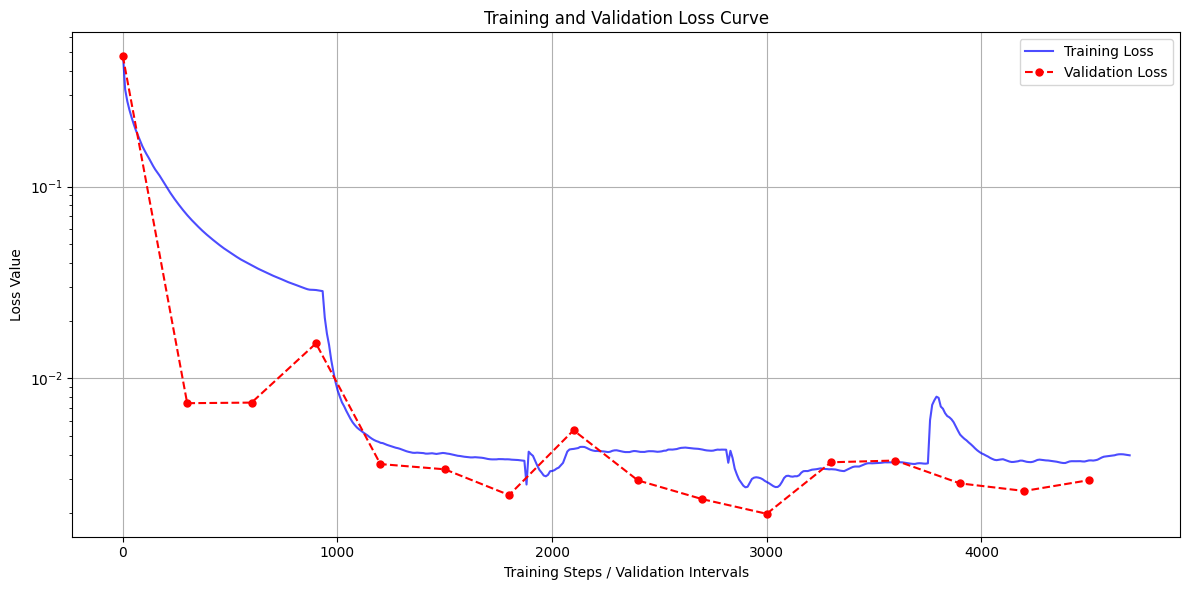

In [4]:
import matplotlib.pyplot as plt
import re

def plot_loss_curves(log_file_content):
    """
    Parses the log file content to extract loss and validation loss,
    then plots them using matplotlib with custom x-axis scaling.

    Args:
        log_file_content (str): The entire content of the log file as a string.
    """
    train_losses = []
    val_losses = []
    train_steps = []
    val_steps = []

    # Regular expressions to find loss and validation loss
    loss_pattern = re.compile(r'loss: (\d+\.\d+), maskA: \d+\.\d+, maskB: \d+\.\d+')
    val_loss_pattern = re.compile(r'Validation loss: (\d+\.\d+)')

    # Counters for the custom x-axis values
    train_counter = 0
    val_counter = 0

    lines = log_file_content.splitlines()

    for line in lines:
        # Try to find validation loss first
        val_match = val_loss_pattern.search(line)
        if val_match:
            try:
                val_loss = float(val_match.group(1))
                val_losses.append(val_loss)
                # First validation at 0, then 300, 600, ...
                val_steps.append(val_counter * 300)
                val_counter += 1
            except ValueError:
                print(f"Warning: Could not parse validation loss from line: {line}")
            continue

        # If not a validation loss, try to find a training loss
        loss_match = loss_pattern.search(line)
        if loss_match:
            try:
                train_loss = float(loss_match.group(1))
                train_losses.append(train_loss)
                # First training loss at 1, then 11, 21, ... (distance of 10)
                train_steps.append(train_counter * 10 + 1)
                train_counter += 1
            except ValueError:
                print(f"Warning: Could not parse training loss from line: {line}")

    # Plotting the data
    plt.figure(figsize=(12, 6))

    if train_losses:
        plt.plot(train_steps, train_losses, label='Training Loss', color='blue', alpha=0.7)
    else:
        print("No training loss data found to plot.")

    if val_losses:
        plt.plot(val_steps, val_losses, label='Validation Loss', color='red', marker='o', linestyle='--', markersize=5)
    else:
        print("No validation loss data found to plot.")

    plt.title('Training and Validation Loss Curve')
    # Updated x-axis label to reflect the new scaling
    plt.xlabel('Training Steps / Validation Intervals')
    plt.ylabel('Loss Value')

    # Add this line for logarithmic scaling on the Y-axis (uncomment to enable)
    plt.yscale('log')

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# The content of your log file will be passed to this function.
# Read the content from the "Download.txt" file.
try:
    with open("Download.txt", "r") as f:
        log_data = f.read()
    plot_loss_curves(log_data)
except FileNotFoundError:
    print("Error: 'Download.txt' not found. Please make sure the file is in the same directory.")
except Exception as e:
    print(f"An error occurred: {e}")
